In [31]:
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
def potential(x):
    return x**2.
# end def 

In [33]:
# initialize walkers
num_walkers = 4000

walkers = np.random.rand(num_walkers)
weights = np.ones(len(walkers))

# define DMC
nsteps = 1000
tau = 0.003

energy_trace = np.zeros(nsteps)
walker_trace = np.zeros([num_walkers,nsteps])
for istep in range(nsteps):
    walker_trace[:,istep] = np.copy(walkers)
    walkers += np.sqrt(tau)*np.random.randn(len(walkers))
    weights *= np.exp(-potential(walkers)*tau)
    energy_trace[istep] = (potential(walkers)*weights).mean()/sum(weights)
# end for istep

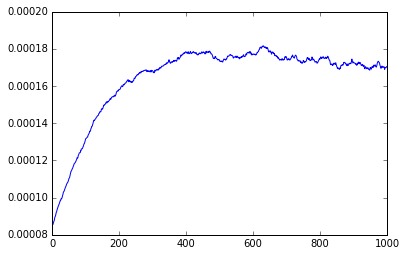

In [34]:
plt.plot(energy_trace)

In [35]:
equil = walker_trace[:,600:]
equil = equil.reshape(len(equil)*len(equil[0]))

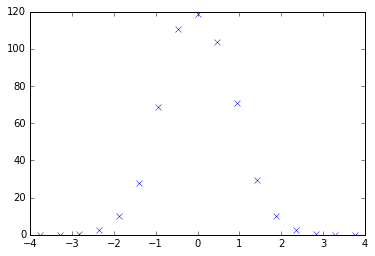

In [36]:
ncounters = 17
bins = np.linspace(-4,4,ncounters + 1)
counters = np.zeros(ncounters)

for i in range(len(counters)):
    for j in range(len(walkers)):
        walker = walkers[j]
        if walker > bins[i] and walker <= bins[i+1]:
            counters[i] += weights[j]
        # end if
    # end for j
# end for i   

dx = bins[1]-bins[0]
xgrid = bins[:-1]+dx/2.
plt.plot(xgrid,counters,"x")

In [37]:
def gauss_1d(x,A,a,xo):
    return A*np.exp(-a*(x-xo)**2.)
# end def gauss_1d
popt,pcov = op.curve_fit(gauss_1d,xgrid,counters,p0=[25,1,0.5])

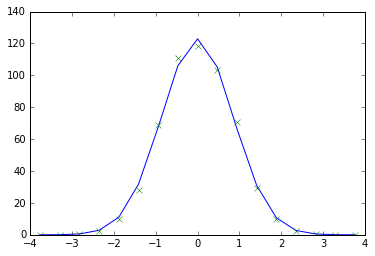

In [38]:
plt.plot(xgrid,gauss_1d(xgrid,*popt))
plt.plot(xgrid,counters,"x")

In [39]:
popt[1]

0.68539864303695475

In [40]:
1/np.sqrt(2)

0.70710678118654746